In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint
import pandas_datareader.data as web

In [0]:
gspc_df = pd.read_csv('SPY.csv')
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])

cut_off_date = '2010-01-01' 
gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]
gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4264,2010-01-04,112.370003,113.389999,111.510002,113.330002,93.244675,118944600
4265,2010-01-05,113.260002,113.680000,112.849998,113.629997,93.491486,111579900
4266,2010-01-06,113.519997,113.989998,113.430000,113.709999,93.557304,116074400
4267,2010-01-07,113.500000,114.330002,113.180000,114.190002,93.952278,131091100
4268,2010-01-08,113.889999,114.620003,113.660004,114.570000,94.264915,126402800


In [0]:
new_set = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(gspc_df)-row_quant)
    market_subset = gspc_df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))


0
2010-12-29 00:00:00
2000
2015-01-16 00:00:00
4000
2016-05-27 00:00:00
6000
2011-03-24 00:00:00
8000
2015-03-10 00:00:00
10000
2011-09-19 00:00:00
12000
2013-08-29 00:00:00
14000
2011-11-30 00:00:00
16000
2017-07-14 00:00:00
18000
2015-07-06 00:00:00
20000
2013-07-23 00:00:00
22000
2014-01-06 00:00:00
24000
2018-12-06 00:00:00
26000
2018-06-12 00:00:00
28000
2014-02-28 00:00:00
30000
2015-05-20 00:00:00
32000
2018-10-05 00:00:00
34000
2014-05-09 00:00:00
36000
2016-05-18 00:00:00
38000
2018-10-05 00:00:00
40000
2019-03-08 00:00:00
42000
2010-04-26 00:00:00
44000
2017-11-15 00:00:00
46000
2011-08-30 00:00:00
48000
2011-02-23 00:00:00
50000
2013-06-18 00:00:00
52000
2015-01-12 00:00:00
54000
2011-03-08 00:00:00
56000
2019-09-20 00:00:00
58000
2019-09-23 00:00:00
60000
2013-12-06 00:00:00
62000
2018-04-09 00:00:00
64000
2010-04-15 00:00:00
66000
2019-06-25 00:00:00
68000
2010-08-31 00:00:00
70000
2019-03-05 00:00:00
72000
2012-01-24 00:00:00
74000
2014-05-21 00:00:00
76000
2016-05-06 00:

In [0]:
len(market_subset)

24

In [0]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(1998864, 8)
(1798864, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
5274,99999,2014-02-06,0.000218,0.000218,-0.000328,0.121170,0.000382,-5898900.0
5275,99999,2014-02-06,0.000654,0.001632,-0.000492,-0.061076,-0.002553,11343000.0
5276,99999,2014-02-06,0.002723,0.000489,0.001149,0.125084,0.001033,47865600.0
5277,99999,2014-02-06,-0.013305,-0.000217,-0.009125,0.469149,-0.010780,-44875900.0
5278,99999,2014-02-06,0.010898,-0.002226,0.003364,-0.299388,0.007570,-6490300.0
5279,99999,2014-02-06,0.005390,0.006367,0.009673,-0.061803,0.003042,-26235200.0
5280,99999,2014-02-06,-0.001300,-0.001514,0.000653,-0.266277,0.000760,35558100.0
5281,99999,2014-02-06,-0.004229,-0.001137,-0.002774,0.491877,-0.002499,-19227500.0
5282,99999,2014-02-06,0.002941,0.001735,-0.001473,-0.178282,-0.002815,-27350300.0
5283,99999,2014-02-06,0.000652,-0.001082,0.004698,-0.308620,-0.001030,71226000.0


In [0]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
4500,0,2010-12-29,0.003894,0.005187,0.006045,-0.103711,-0.001694,-6133400.0
4501,0,2010-12-29,0.005818,0.004677,0.004710,-0.049581,0.002739,16241000.0
4502,0,2010-12-29,0.000643,0.004815,0.006385,0.138137,-0.003918,13436900.0
4503,0,2010-12-29,0.000883,0.000240,-0.001847,0.100416,-0.000641,13573500.0
4504,0,2010-12-29,-0.004572,-0.002396,-0.003218,0.092180,-0.002732,24212100.0


In [0]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)

In [0]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
5284,99999,2014-02-06,L,H,L,76180200.0,LHL
5285,99999,2014-02-06,L,H,L,-27834000.0,LHL
5286,99999,2014-02-06,L,L,L,-70379900.0,LLL
5287,99999,2014-02-06,H,L,H,106134100.0,HLH
5288,99999,2014-02-06,L,H,M,-97659200.0,LHM
5289,99999,2014-02-06,H,L,M,75739800.0,HLM
5290,99999,2014-02-06,L,H,H,60159200.0,LHH
5291,99999,2014-02-06,L,H,L,-89824700.0,LHL
5292,99999,2014-02-06,H,L,M,-781900.0,HLM
5293,99999,2014-02-06,M,M,M,-31352900.0,MMM


In [0]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.798864e+06
mean    -4.109206e+04
std      4.749534e+07
min     -2.694189e+08
25%     -2.283400e+07
50%     -4.090000e+05
75%      2.137220e+07
max      3.183834e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [0]:
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2010-12-29,"{HML, HMH, MHL, MMM, LML, HHH, LLM, MLM, HLH, ..."
1,1,2011-07-05,"{LHM, LLL, MML, LHL, HLH, LHL, MML, HLH, LHL, ..."
2,2,2018-11-29,"{HHH, LLM, LHL, LML, LML, LHL, HMH, MMH, LLL, ..."
3,3,2012-04-18,"{LML, MMH, LMM, LHL, HLL, HMH, LML, MML, HMH}"
4,4,2016-10-20,"{HLM, LHL, MLM, LHH, MML, LLL, HHL, MLM}"


In [0]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,-3.198294e+04
std,28867.657797,4.940565e+06
min,0.000000,-4.919312e+07
25%,24999.750000,-1.955315e+06
50%,49999.500000,-1.150964e+05
75%,74999.250000,1.771200e+06
max,99999.000000,6.554262e+07


In [0]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2010-12-29,"{HML, HMH, MHL, MMM, LML, HHH, LLM, MLM, HLH, ...",-5.051692e+06
1,1,2011-07-05,"{LHM, LLL, MML, LHL, HLH, LHL, MML, HLH, LHL, ...",-3.274010e+06
2,2,2018-11-29,"{HHH, LLM, LHL, LML, LML, LHL, HMH, MMH, LLL, ...",-1.360380e+06
3,3,2012-04-18,"{LML, MMH, LMM, LHL, HLL, HMH, LML, MML, HMH}",-2.556867e+06
4,4,2016-10-20,"{HLM, LHL, MLM, LHH, MML, LLL, HHL, MLM}",2.723100e+06


In [0]:
compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2010-12-29,"HML,HMH,MHL,MMM,LML,HHH,LLM,MLM,HLH,MLM,MMM,ML...",-5.051692e+06
1,1,2011-07-05,"LHM,LLL,MML,LHL,HLH,LHL,MML,HLH,LHL,MMM,LLL,HL...",-3.274010e+06
2,2,2018-11-29,"HHH,LLM,LHL,LML,LML,LHL,HMH,MMH,LLL,LHL,HLL,LL...",-1.360380e+06
3,3,2012-04-18,"LML,MMH,LMM,LHL,HLL,HMH,LML,MML,HMH",-2.556867e+06
4,4,2016-10-20,"HLM,LHL,MLM,LHH,MML,LLL,HHL,MLM",2.723100e+06


In [0]:
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(2614, 4)

In [0]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(97386, 4)

In [0]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [0]:
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [0]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    9.738600e+04
mean    -1.674450e+04
std      4.993173e+06
min     -4.919312e+07
25%     -1.963747e+06
50%     -1.064402e+05
75%      1.816048e+06
max      6.554262e+07
Name: Outcome_Next_Day_Direction, dtype: float64

In [0]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

97386


4756

In [0]:
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))     

all moves: 97386
big moves only: 4756


In [0]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
9,9,"HHH,MMM,LHL,LLM,LLL,LHL,HMH,LLL",1
21,21,"LHL,LHH,MLM,LHM,LHL,LML,MML,HMM,LHL,HMH",1
26,26,"HHM,LLM,HMH,MHH,HLH,HMM,HHH,MHH,MLL,LHL,HLH,MHH",0
54,54,"HMH,LLL,MHH,LML,HLH,LML,LML,HLH,HMM,LHL,LLL,HH...",0
64,64,"LHL,HLM,HHH,LML,HMH,HLH,HLH,MML,LLL,LHL,MMH,HL...",0


In [0]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(2491, 2)
(2265, 2)


In [0]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [0]:
compressed_set['Outcome_Next_Day_Direction'].head()       

9     1
21    1
26    0
54    0
64    0
Name: Outcome_Next_Day_Direction, dtype: int64

In [0]:
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)
 
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,LHL,LHM,LLH,LLL,LLM,LMH,LML,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.000000,0.000000,0.000000,0.148386,0.00,0.082278,0.084364,0.0,0.151629,0.000000,0.038115,0.000000,0.007042,0.135195,0.230769,0.0,0.081369,0.000000,0.095732,0.147287,0.000000,0.170435,0.047085,0.358862,0.158311,0.000000,0.059406
HHL,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.054965,0.000000,0.0,0.014229,0.000000,0.000000,0.000000,0.000000,0.008696,0.000000,0.053611,0.000000,0.000000,0.000000
HHM,0.000000,0.000000,0.000000,0.001899,0.00,0.000000,0.012367,0.0,0.011278,0.022444,0.000000,0.000000,0.422535,0.000000,0.279720,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.034783,0.047085,0.037199,0.000000,0.000000,0.047855
HLH,0.126912,0.147619,0.147632,0.065764,0.53,0.025316,0.121025,0.0,0.340852,0.049875,0.141402,0.338028,0.598592,0.155585,0.000000,0.0,0.132059,0.195122,0.246828,0.015504,0.013072,0.445217,0.146861,0.156455,0.284960,0.354802,0.127063
HLL,0.011162,0.000000,0.000000,0.063390,0.00,0.000000,0.001767,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007092,0.000000,0.0,0.030236,0.062718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,LHL,LHM,LLH,LLL,LLM,LMH,LML,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.000000,0.000000,0.000000,0.003393,0.000000,0.055762,0.063852,0.165049,0.000000,0.000000,0.027314,0.016517,0.078704,0.366801,0.375000,0.039832,0.047485,0.000971,0.000000,0.0,0.025357,0.042334,0.009534,0.166269,0.018182,0.034014,0.147529
HHL,0.000000,0.000000,0.000000,0.001044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016734,0.000000,0.000000,0.005339,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.005364,0.000000,0.000000,0.000000
HHM,0.006719,0.000000,0.000000,0.019838,0.000000,0.000000,0.017508,0.000000,0.000000,0.119632,0.004580,0.000000,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.0,0.012678,0.000000,0.000000,0.013707,0.008081,0.000000,0.015209
HLH,0.068309,0.333333,0.059406,0.145132,0.152893,0.078067,0.176107,0.000000,0.130638,0.018405,0.176317,0.313814,0.597222,0.005355,0.178030,0.090147,0.052262,0.066019,0.129252,0.0,0.014263,0.127002,0.284958,0.087008,0.161616,0.008163,0.132319
HLL,0.000000,0.000000,0.000000,0.010441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018939,0.000000,0.000000,0.102913,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.053061,0.039544


In [0]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
1.2420563525025483
-11.888337969029447
outcome: 1
0.22015241926463258
-14.180374194294927
outcome: 0
0.34310033881195223
-5.436830518377618
outcome: 0
0.9675361851517915
-27.0709039364144
outcome: 0
1.0934740653928077
-27.946431734205937
outcome: 0
0.6575308841592965
-43.09875661041181
outcome: 1
0.9422290398925686
7.605177323073398
outcome: 1
0.4812390597181432
-22.111490920753386
outcome: 1
0.7220756504108227
-8.450452369420296
outcome: 0
0.8937027954785198
-9.69574959197438
outcome: 0
1.7509029482632232
9.859653400109393
outcome: 0
0.6918662779478428
-23.68704204658876
outcome: 1
0.7239275752278933
5.101989235250291
outcome: 0
0.8903456942643505
8.065369723939405
outcome: 0
1.1464235124330824
-13.356794097240199
outcome: 1
0.626249807368522
-19.6586982471431
outcome: 1
1.1095456326031343
-16.339261312911034
outcome: 0
0.26053620123289317
-3.633498666023987
outcome: 1
0.6875760496309411
2.961006320014252
outcome: 1
1.526266760400814
-8.273954228826023
outcome: 1
0.19285937

array([[1277,  232],
       [ 730,  375]])

In [0]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 63.2 %


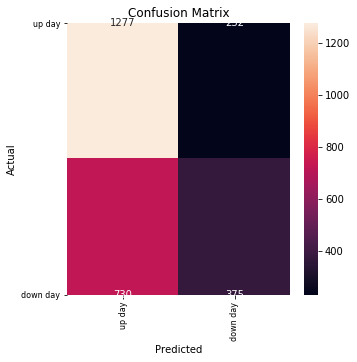

In [0]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()